In [32]:
import numpy as np
import pandas as pd
import torch

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier

In [2]:
df_train = pd.read_csv('silero-stress-predictor/train.csv', index_col=[0])

In [3]:
df_test = pd.read_csv('silero-stress-predictor/test.csv', index_col=[0])

In [4]:
df_train

,word,stress,num_syllables,lemma
id,,,,
0,румяной,2,3,румяный
1,цифрами,1,3,цифра
2,слугами,1,3,слуга
3,выбирает,3,4,выбирать
4,управдом,3,3,управдом
...,...,...,...,...
63433,экзамена,2,4,экзамен
63434,культурой,2,3,культура
63435,объемной,2,3,объемный


In [5]:
df_test

,word,num_syllables,lemma
id,,,
0,эпилепсия,5,эпилепсия
1,относящейся,5,относиться
2,размышлениями,6,размышление
3,модемы,3,модем
4,солнц,1,солнце
...,...,...,...
29955,донбасса,3,донбасс
29956,обложка,3,обложка
29957,правителя,4,правитель


In [6]:
X = df_train.copy()
y = X.pop('stress')

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=.2)

In [8]:
baseline_model = CatBoostClassifier(learning_rate=0.25, iterations=50)

In [9]:
cat_feat = list(X.columns)

In [10]:
cat_feat

['word', 'num_syllables', 'lemma']

In [11]:
baseline_model.fit(X_train, y_train, cat_features=cat_feat)

0:	learn: 1.4587517	total: 97.7ms	remaining: 4.79s
1:	learn: 1.0987225	total: 143ms	remaining: 3.44s
2:	learn: 0.9447673	total: 185ms	remaining: 2.9s
3:	learn: 0.8496705	total: 229ms	remaining: 2.64s
4:	learn: 0.7861360	total: 273ms	remaining: 2.46s
5:	learn: 0.7418657	total: 316ms	remaining: 2.32s
6:	learn: 0.7083622	total: 359ms	remaining: 2.21s
7:	learn: 0.6836122	total: 408ms	remaining: 2.14s
8:	learn: 0.6654717	total: 450ms	remaining: 2.05s
9:	learn: 0.6515110	total: 495ms	remaining: 1.98s
10:	learn: 0.6416433	total: 540ms	remaining: 1.91s
11:	learn: 0.6325842	total: 585ms	remaining: 1.85s
12:	learn: 0.6262230	total: 622ms	remaining: 1.77s
13:	learn: 0.6208394	total: 660ms	remaining: 1.7s
14:	learn: 0.6170771	total: 695ms	remaining: 1.62s
15:	learn: 0.6145694	total: 727ms	remaining: 1.54s
16:	learn: 0.6114261	total: 768ms	remaining: 1.49s
17:	learn: 0.6089933	total: 811ms	remaining: 1.44s
18:	learn: 0.6070307	total: 854ms	remaining: 1.39s
19:	learn: 0.6048774	total: 899ms	remainin

In [12]:
y_train_pred = baseline_model.predict(X_train)

In [13]:
accuracy_score(y_train, y_train_pred)

0.943231527093596

In [14]:
y_valid_pred = baseline_model.predict(X_valid)

In [15]:
accuracy_score(y_valid, y_valid_pred)

0.8311790668348046

## Получение ударений для test-файла

In [16]:
pip install russtress

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from russtress import Accent 
accent = Accent()
text = 'Проставь, пожалуйста, ударения'
accented_text = accent.put_stress(text)
accented_text

In [18]:
df_test['word_accent'] = np.nan

In [19]:
df_test

,word,num_syllables,lemma,word_accent
id,,,,
0,эпилепсия,5,эпилепсия,NaN
1,относящейся,5,относиться,NaN
2,размышлениями,6,размышление,NaN
3,модемы,3,модем,NaN
4,солнц,1,солнце,NaN
...,...,...,...,...
29955,донбасса,3,донбасс,NaN
29956,обложка,3,обложка,NaN
29957,правителя,4,правитель,NaN


In [20]:
df_test['word'][0]

'эпилепсия'

In [21]:
for i in range(len(df_test)):
    df_test['word_accent'][i] = accent.put_stress(df_test['word'][i])

/tmp/ipykernel_451931/1551220807.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['word_accent'][i] = accent.put_stress(df_test['word'][i])


KeyboardInterrupt: 

In [ ]:
df_test

,word,num_syllables,lemma,word_accent
id,,,,
0,эпилепсия,5,эпилепсия,эпиле'псия
1,относящейся,5,относиться,относя'щейся
2,размышлениями,6,размышление,размышле'ниями
3,модемы,3,модем,мо'демы
4,солнц,1,солнце,солнц
...,...,...,...,...
29955,донбасса,3,донбасс,донба'сса
29956,обложка,3,обложка,обло'жка
29957,правителя,4,правитель,прави'теля


In [25]:
glasn_list = ['а', 'я', 'у', 'ю', 'о', 'е', 'ё', 'э', 'и', 'ы']

In [ ]:
"эпиле'псия".split("'")[0]

'эпиле'

In [ ]:
"солнц".split("'")[0]

'солнц'

In [ ]:
count = 0
for i in "обло'жка".split("'")[0]:
    if i in glasn_list:
        count += 1
count


2

In [ ]:
df_test['stress'] = np.nan

In [ ]:
for i in range(len(df_test)):
    count = 0
    for j in df_test['word_accent'][i].split("'")[0]:
        if j in glasn_list:
            count += 1
    df_test['stress'][i] = count

/tmp/ipykernel_8081/767896567.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['stress'][i] = count


In [ ]:
df_test

,word,num_syllables,lemma,word_accent,stress
id,,,,,
0,эпилепсия,5,эпилепсия,эпиле'псия,3.0
1,относящейся,5,относиться,относя'щейся,3.0
2,размышлениями,6,размышление,размышле'ниями,3.0
3,модемы,3,модем,мо'демы,1.0
4,солнц,1,солнце,солнц,1.0
...,...,...,...,...,...
29955,донбасса,3,донбасс,донба'сса,2.0
29956,обложка,3,обложка,обло'жка,2.0
29957,правителя,4,правитель,прави'теля,2.0


In [ ]:
#df_test.to_csv('df_test_accented.csv')

In [ ]:
pd.read_csv('df_test_accented.csv', index_col=[0])

,word,num_syllables,lemma,word_accent,stress
id,,,,,
0,эпилепсия,5,эпилепсия,эпиле'псия,3.0
1,относящейся,5,относиться,относя'щейся,3.0
2,размышлениями,6,размышление,размышле'ниями,3.0
3,модемы,3,модем,мо'демы,1.0
4,солнц,1,солнце,солнц,1.0
...,...,...,...,...,...
29955,донбасса,3,донбасс,донба'сса,2.0
29956,обложка,3,обложка,обло'жка,2.0
29957,правителя,4,правитель,прави'теля,2.0


In [ ]:
X_test = df_test.drop(columns='word_accent').copy()
y_test = X_test.pop('stress')

In [ ]:
y_test_pred = baseline_model.predict(X_test)

In [ ]:
accuracy_score(y_test, y_test_pred)

0.6709612817089453

In [32]:
slogov_vsego = []
redkoe_slovo = []
for i in df_train['lemma']:
    count = 0
    for j in i:
        if j in glasn_list:
            count += 1
            if count == 7:
                redkoe_slovo.append(i)
    slogov_vsego.append(count)
max(slogov_vsego)
redkoe_slovo

['сосредоточиваться',
 'перенапряжение',
 'сосредотачиваться',
 'совершеннолетняя',
 'сосредотачиваться',
 'разочарование',
 'разочаровываться',
 'совершеннолетняя',
 'жертвоприношение',
 'нанотехнология',
 'сосредотачиваться',
 'наименование',
 'проконсультироваться',
 'приостанавливаться',
 'удостоверение',
 'металлоизделие',
 'разочаровываться',
 'недоразумение',
 'переименовывать',
 'электропередача',
 'противопоказанный',
 'ориентироваться',
 'преобразовываться',
 'правонарушение',
 'авиакомпания',
 'преобразовываться',
 'сосредоточиваться',
 'сосредотачиваться',
 'переименовывать',
 'зарегистрироваться']

## Модель

создать список 
гласных (числа ближе к 100)
согласных (ближе к 0)
рлмнй (подумать)
ьЪ (подумать)

Разбить на слоги, сделать картинки 6 на 6

In [16]:
list_train = list(df_train['word'])
list_test = list(df_test['word'])
list_lemma_train = list(df_train['lemma'])
list_lemma_test = list(df_test['lemma'])

In [17]:
list_num_slogov_train = list(df_train['num_syllables'])
list_num_slogov_test = list(df_test['num_syllables'])

In [18]:
glasn_list = ['а', 'я', 'у', 'ю', 'о', 'е', 'ё', 'э', 'и', 'ы']
soglasn_list = ['б','в','г','д','ж','з','к','п','с','т','ф','х','ц','ч','ш','щ']
sonor_list = ['л','м','н','р','й']
dop_list = ['ь','ъ']

In [19]:
letters_dict = {'а':240,'я':241,'у':242,'ю':243,'о':244,'е':248,'ё':249,'э':247,'и':246,'ы':245,
                'б':150,'в':151,'г':152,'д':153,'ж':154,'з':155,
                'к':100,'п':101,'с':102,'т':103,'ф':104,'х':105,'ц':106,'ч':107,'ш':108,'щ':109,
                'л':180,'м':181,'н':182,'р':183,'й':184,
                'ь':50,'ъ':51, '0':0}

In [ ]:
for i in list_train[:100]:          #для i-того слова
    slog_count = 0 
    sonor = 0
    bukv_v_sloge = 0
    for j in range(len(i)):               #для j-той по счёту буквы
        if j in glasn_list:
            slog_count +=1
            if 


In [ ]:
for i in 'разглагольствовать':
    if буква не последняя:
        if гласная

        if согласная

        if сонорная

        if ьъ

    if последняя
        то не проверяем следующую, потому что её нет

In [20]:
word = 'разглагольствовать'
word = 'арбалет'
#word = 'арбуз'
new_word = ''
slogov = 3
counter_slogov = 0
word = word+'  '
for i in range(len(word)):
    if i==0:
        if word[i] in glasn_list:
            counter_slogov += 1
            if counter_slogov == slogov:
                new_word += word[i]
            else:
                new_word += word[i]
                if word[i+1] in glasn_list:
                    new_word += '-'
                if word[i+1] in sonor_list:
                    if word[i+2] in glasn_list:
                        new_word += '-'
        else:
            new_word += word[i]
    #if i==len(word)-1:

    else:
        if word[i] in glasn_list:
            counter_slogov += 1
            if counter_slogov == slogov:
                new_word += word[i]
            else:
                new_word += word[i]
                if word[i+1] in glasn_list:
                    new_word += '-'
                if word[i+1] in soglasn_list:
                    new_word += '-'
                if word[i+1] in sonor_list:
                    if word[i+2] in glasn_list:
                        new_word += '-'
        if word[i] in soglasn_list:
            new_word += word[i]
        if word[i] in dop_list:
            if counter_slogov == slogov:
                new_word += word[i]
            else:
                new_word += word[i]+'-'
        if word[i] in sonor_list:
            if word[i-1] in glasn_list and word[i+1] in soglasn_list:
                new_word += word[i]+'-'
            else:
                new_word += word[i]
            
new_word

'ар-ба-лет'

In [23]:
#def slog_split(word_list, list_num_slogov): #неправильная версия
    new_word_list = []

    for word, slogov in zip(word_list,list_num_slogov):
        new_word = ''
        counter_slogov = 0
        word = word+'  '
        for i in range(len(word)):
            if i==0:
                if word[i] in glasn_list:
                    counter_slogov += 1
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        new_word += word[i]
                        if word[i+1] in glasn_list:
                            new_word += '-'
                        if word[i+1] in sonor_list:
                            if word[i+2] in glasn_list:
                                new_word += '-'
                else:
                    new_word += word[i]

            else:
                if word[i] in glasn_list:
                    counter_slogov += 1
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        new_word += word[i]
                        if word[i+1] in glasn_list:
                            new_word += '-'
                        if word[i+1] in soglasn_list:
                            new_word += '-'
                        if word[i+1] in sonor_list:
                            if word[i+2] in glasn_list:
                                new_word += '-'
                if word[i] in soglasn_list:
                    new_word += word[i]
                if word[i] in dop_list:
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        new_word += word[i]+'-'
                if word[i] in sonor_list:
                    if word[i-1] in glasn_list and word[i+1] in soglasn_list:
                        new_word += word[i]+'-'
                    else:
                        new_word += word[i]
        new_word_list.append(new_word)
                    
    return new_word_list

IndentationError: unexpected indent (792905490.py, line 2)

In [20]:
def slog_split(word_list, list_num_slogov):
    new_word_list = []
    #word = 'разглагольствовать'
    #word = 'арбалет'
    #word = 'арбуз'
    for word, slogov in zip(word_list,list_num_slogov):
        new_word = ''
        #slogov = 3
        counter_slogov = 0
        word = word+'  '
        for i in range(len(word)):
            if i==0:
                if word[i] in glasn_list:
                    counter_slogov += 1
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        new_word += word[i]
                        if word[i+1] in glasn_list:
                            new_word += '-'
                        if word[i+1] in soglasn_list:
                            new_word += '-'
                        if word[i+1] in sonor_list:
                            if word[i+2] in glasn_list:
                                new_word += '-'
                else:
                    new_word += word[i]
            #if i==len(word)-1:

            else:
                if word[i] in glasn_list:
                    counter_slogov += 1
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        new_word += word[i]
                        if word[i+1] in glasn_list:
                            new_word += '-'
                        if word[i+1] in soglasn_list:
                            new_word += '-'
                        if word[i+1] in sonor_list:
                            if word[i+2] in glasn_list:
                                new_word += '-'
                            if word[i+2] == word[i+1]: #парные сонорные НН
                                new_word += '-'
                if word[i] in soglasn_list:
                    new_word += word[i]
                if word[i] in dop_list:
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        new_word += word[i]+'-'
                if word[i] in sonor_list:
                    if counter_slogov == slogov:
                        new_word += word[i]
                    else:
                        if word[i-1] in glasn_list and word[i+1] in soglasn_list:
                            new_word += word[i]+'-'
                        #дефис между двумя сонорными М-Н, М-Л:
                        elif word[i-1] in glasn_list and word[i+1] in sonor_list and word[i+1]!=word[i]: 
                            new_word += word[i]+'-'
                        else:
                            new_word += word[i]
        new_word_list.append(new_word)
                    
    return new_word_list

In [21]:
train_words_splitted = slog_split(list_train, list_num_slogov_train)
train_words_splitted

['ру-мя-ной',
 'ци-фра-ми',
 'слу-га-ми',
 'вы-би-ра-ет',
 'у-пра-вдом',
 'ку-пю-ру',
 'чёр-та',
 'куль-тур-ной',
 'мэ-ри-и',
 'мар-кер-ны-е',
 'кра-со-те',
 'кро-ва-вым',
 'э-ли-ту',
 'па-ра-гра-фе',
 'ю-ри-ди-че-ско-му',
 'силь-ви-и',
 'вы-де-ле-ни-ю',
 'пе-ре-го-во-рах',
 'ро-ди-тель-ский',
 'при-ка-жи-те',
 'ка-на-дских',
 'о-бжа-рить',
 'здо-ро-вом',
 'ре-пе-ти-то-ров',
 'со-кро-ве-нным',
 'а-бха-зи-ю',
 'мо-ря-ков',
 'и-стре-би-те-ля-ми',
 'на-ра-ста-ю-щим',
 'вы-со-там',
 'пасс',
 'ссо-ри-лись',
 'жир-но-е',
 'де-ти-на',
 'хро-ник',
 'ка-са-ю-ще-е-ся',
 'пре-дпо-сыл-ки',
 'ме-жре-ги-о-наль-ных',
 'во-зду-шной',
 'ли-шив',
 'о-кку-па-ци-и',
 'тро-ту-ар-на-я',
 'о-це-ни-ла',
 'у-чё-ных',
 'ди-а-па-зо-ном',
 'о-бра-тно-е',
 'ра-зби-то-го',
 'сбро-са',
 'шлей-фы',
 'ли-кбез',
 'эр-ми-та-жа',
 'кар-га-поль-е',
 'про-и-сше-дше-го',
 'жё-стко',
 'при-ку-ри-ва-тель',
 'фер-ме',
 'о-тво-дит',
 'ме-же-ва-ни-е',
 'ка-да-стро-вой',
 'во-ло-са-ту-ю',
 'не-у-добств',
 'шам-пинь-о-нов',
 'крыл

In [22]:
test_words_splitted = slog_split(list_test, list_num_slogov_test)

In [23]:
def glasn_count(lemma_list):
    slogov_vsego = []
    for i in lemma_list:
        count = 0
        for j in i:
            if j in glasn_list:
                count += 1
        slogov_vsego.append(count)
    return slogov_vsego

In [24]:
list_num_lemma_train = glasn_count(list_lemma_train)
list_num_lemma_test = glasn_count(list_lemma_test)

In [25]:
train_lemma_splitted = slog_split(list_lemma_train, list_num_lemma_train)
test_lemma_splitted = slog_split(list_lemma_test, list_num_lemma_test)

In [26]:
def letter_pics(splitted_words):
    pictures_list = []
    for i in splitted_words: #(new_word_list[:100],list_num_slogov[:100]):
        picture = []
        slogi = i.split('-')
        total = len(slogi)
        for j in slogi:
            slog = []
            len_sloga = len(j)
            for k in j:
                slog.append(k)
            for zeros in range(14-len_sloga):
                slog.append('0')
            picture.append(slog)
        for empty in range(7-total):
            picture.append(14*['0'])
        pictures_list.append(picture)
    return pictures_list

In [27]:
train_up = letter_pics(train_words_splitted)
test_up = letter_pics(test_words_splitted)
train_down = letter_pics(train_lemma_splitted)
test_down = letter_pics(test_lemma_splitted)

In [28]:
test_down

[[['э', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['п', 'и', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['л', 'е', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['п', 'с', 'и', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['я', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']],
 [['о', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['т', 'н', 'о', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['с', 'и', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['т', 'ь', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['с', 'я', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
  ['0', '0', '0', '0', '0', '0', '0',

In [29]:
def letter_to_num(pics_list):
    new_pics_list = []
    for pic in pics_list:
        new_picture = []
        for slog in pic:
            new_slog = []
            for letter in slog:
                new_slog.append(letters_dict[letter])
            new_picture.append(new_slog)
        new_pics_list.append(new_picture)
                
    return new_pics_list

In [30]:
train_up_num = letter_to_num(train_up)
test_up_num = letter_to_num(test_up)
train_down_num = letter_to_num(train_down)
test_down_num = letter_to_num(test_down)

In [69]:
#train_up_num[0]+train_down_num[0]

[[183, 242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [181, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [182, 244, 184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [183, 242, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [181, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [182, 245, 184, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [72]:
def up_down_connect(pic_up, pic_down):
    full_pics_list = []
    for i,j in zip(pic_up, pic_down):
        full_pic = i+j
        full_pics_list.append(np.array(full_pic))
    return full_pics_list
    


In [73]:
train_full = up_down_connect(train_up_num, train_down_num)
test_full = up_down_connect(test_up_num, test_down_num)

In [76]:
train_full[0]

array([[183, 242,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [181, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [182, 244, 184,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [183, 242,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [181, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [182, 245, 184,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 

- посчитать число слогов для словоформ (сделано)
- соединить слово и словоформу в одну картинку 14 на 14 (но можно подумать и про меньшее число столбцов) (сделано)
- перевести в тензор
- загрузить картинки в нейросеть

In [67]:
#tensor_x = torch.Tensor(np.array(train_full))
#tensor_x

/tmp/ipykernel_6053/270472272.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tensor_x = torch.Tensor(np.array(train_full))


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [38]:
#tensor_y = torch.Tensor(df_train['stress'])
#tensor_y

tensor([2., 1., 1.,  ..., 2., 2., 2.])

In [70]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
from torchvision import transforms
from PIL import Image 

In [41]:
#TensorDataset(train_full, tensor_y)

AttributeError: 'list' object has no attribute 'size'

In [84]:
class MyDataset(Dataset):
    def __init__(self, data, targets, transform = None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        y = self.targets[index]

        if self.transform:
            x = Image.fromarray(self.data[index].astype(np.uint8))
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [85]:
transform = transforms.ToTensor()
dataset = MyDataset(train_full, df_train['stress'], transform=transform)

In [86]:
DataLoader(dataset, batch_size=32)

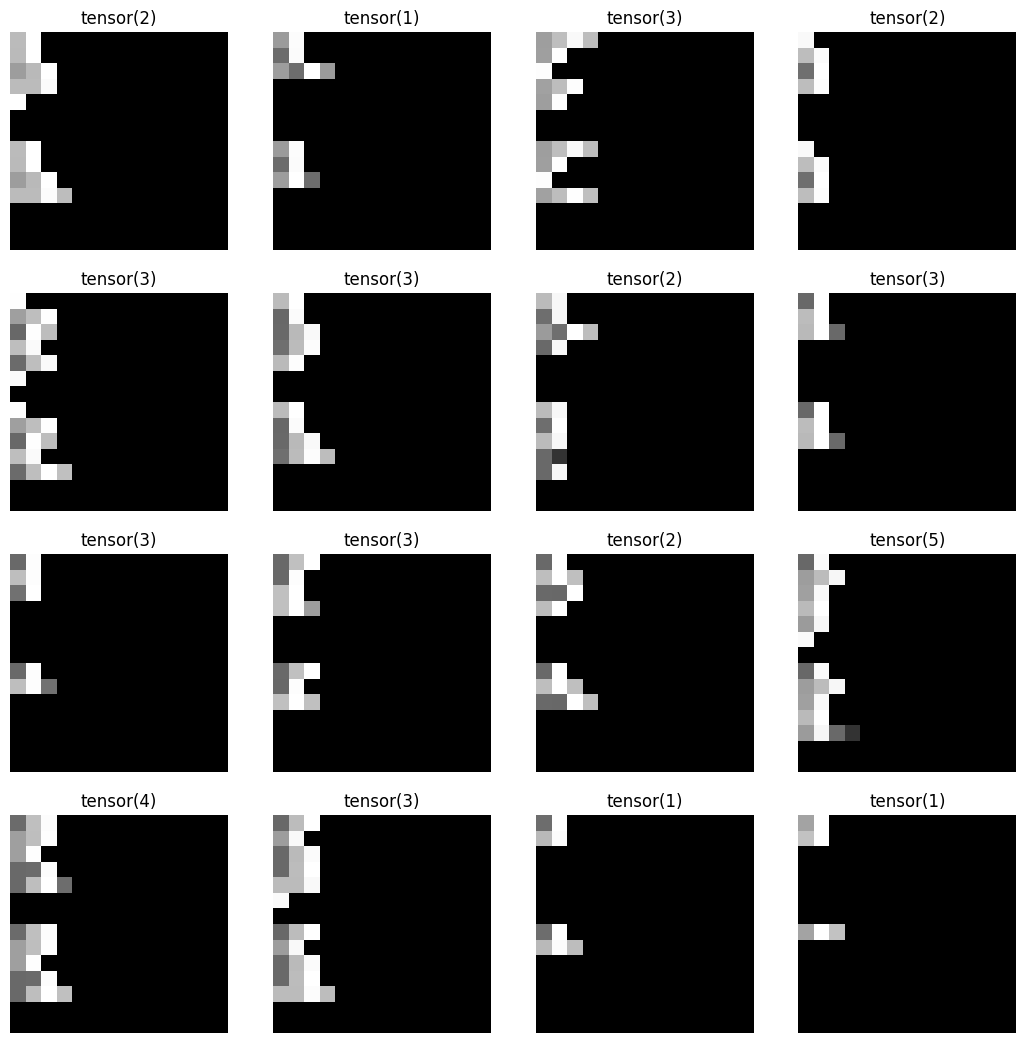

In [88]:
figure = plt.figure(figsize=(13, 13))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(dataset), size=(1,)).item()
    img, label = dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()